# 🚰 Machine Learning Predictive Maintenance for Tanzanian Water Infrastructure

![Status](https://img.shields.io/badge/Status-Completed-green)
![Python](https://img.shields.io/badge/Python-3.9%2B-blue)
![Library](https://img.shields.io/badge/Library-Scikit--Learn-orange)
![Library](https://img.shields.io/badge/Library-Pandas-150458)
![Library](https://img.shields.io/badge/Library-NumPy-013243)

> **Author:** Ghansyam Panera
> **Enrollment No:** 24010101668
> **Roll No:** 727 
> **Domain:** Machine Learning for Social Good  
> **Dataset Source:** [DrivenData / Taarifa](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/)

---

## 1. 🌍 Executive Summary
Tanzania faces a critical water crisis where **~46% of water points are either broken or in need of repair**. The current maintenance model is "Reactive" (fix it after it breaks), leading to long downtimes and health risks for rural communities.

This project proposes a **Predictive Maintenance System**. Using historical data from over **59,000 water points**, we are building a Machine Learning classifier to identify pumps that are **"Functional"**, **"Non Functional"**, and **"Functional but needing repair"** (the early warning signal) before they fail completely.

---

## 2. 🚨 The Problem Statement
The dataset presents a massive **Class Imbalance** challenge:

| Status Group | Count | Percentage | Risk Level |
| :--- | :--- | :--- | :--- |
| **Functional** | ~32,200 | **54.3%** | Low |
| **Non-Functional** | ~22,800 | **38.4%** | Critical (Too Late) |
| **Functional Needs Repair** | ~4,300 | **7.3%** | **High (Early Warning)** |

**The Technical Challenge:** Standard Machine Learning models ignore the **7% minority class** to maximize accuracy. Our goal is to force the model to detect these specific pumps to enable proactive repairs.

---

# 1. Import Libraries

In [67]:
import pandas as pd
import numpy as np

# 2. Read both input files

In [46]:
train_values=pd.read_csv('/kaggle/input/pump-it-up-data-mining-the-water-table/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')
train_labels=pd.read_csv('/kaggle/input/pump-it-up-data-mining-the-water-table/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')

# 3. Merge them on the 'id' column

In [47]:
df=pd.merge(train_values,train_labels,on='id')

# 4. Sanity Check

In [48]:
print("Shape of merged data : ",df.shape)
df.head()

Shape of merged data :  (59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# 5. Describe all columns to get top frequencies, min/max, means, deviations

In [49]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,59400.0,NaN,NaN,NaN,37115.131768,21453.128371,0.0,18519.75,37061.5,55656.5,74247.0
amount_tsh,59400.0,NaN,NaN,NaN,317.650385,2997.574558,0.0,0.0,0.0,20.0,350000.0
date_recorded,59400,356,2011-03-15,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funder,55763,1896,Government Of Tanzania,9084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,59400.0,NaN,NaN,NaN,668.297239,693.11635,-90.0,0.0,369.0,1319.25,2770.0
installer,55745,2145,DWE,17402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,59400.0,NaN,NaN,NaN,34.077427,6.567432,0.0,33.090347,34.908743,37.178387,40.345193
latitude,59400.0,NaN,NaN,NaN,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-0.0
wpt_name,59398,37399,none,3563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_private,59400.0,NaN,NaN,NaN,0.474141,12.23623,0.0,0.0,0.0,0.0,1776.0


# 5. List of columns to drop

In [50]:
drop_list = [
    'amount_tsh',             # 75% zeros, unreliable
    'wpt_name',               # High cardinality, name of waterpoint
    'num_private',            # Mostly zeros, unclear meaning
    'subvillage',             # 19k+ unique values (too complex)
    'region',                 # Redundant (we have region_code)
    'lga',                    # Redundant (we have district_code)
    'ward',                   # High cardinality (2k+ values)
    'recorded_by',            # Constant value (only one group recorded data)
    'extraction_type',        # Too specific (kept extraction_type_group)
    'extraction_type_class',  # Too broad (kept extraction_type_group)
    'management_group',       # Redundant (kept management)
    'payment_type',           # Duplicate (kept payment)
    'quality_group',          # Loss of "abandoned" info (kept water_quality)
    'quantity_group',         # Duplicate (kept quantity)
    'source_type',            # Loss of detail (kept source)
    'source_class',           # Too broad (kept source)
    'waterpoint_type_group'   # Loss of detail (kept waterpoint_type)
]

df.drop(columns=drop_list,inplace=True)
print(f"New Dataframe Shape: {df.shape}")
print("Remaining Columns:", df.columns.tolist())

New Dataframe Shape: (59400, 24)
Remaining Columns: ['id', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'basin', 'region_code', 'district_code', 'population', 'public_meeting', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type_group', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type', 'status_group']


# 6. Fill zeros in construction year with regional_code and district_code wise median create new column age_pump when last visited

In [51]:
df['construction_year_missing'] = (df['construction_year'] == 0).astype(int)

In [52]:
df['construction_year'] = df['construction_year'].replace(0, np.nan)

df['construction_year'] = df['construction_year'].fillna(
    df.groupby(['region_code', 'district_code'])['construction_year'].transform('median')
)
df['construction_year'] = df['construction_year'].fillna(
    df.groupby(['region_code'])['construction_year'].transform('median')
)
df['construction_year'] = df['construction_year'].fillna(df['construction_year'].median())

df['date_recorded'] = pd.to_datetime(df['date_recorded'])

df['age_pump'] = df['date_recorded'].dt.year - df['construction_year']

df.loc[df['age_pump'] < 0, 'age_pump'] = 0

print("Sample of fixed data:")
print(df[['construction_year', 'date_recorded', 'age_pump', 'construction_year_missing']].head())

Sample of fixed data:
   construction_year date_recorded  age_pump  construction_year_missing
0             1999.0    2011-03-14      12.0                          0
1             2010.0    2013-03-06       3.0                          0
2             2009.0    2013-02-25       4.0                          0
3             1986.0    2013-01-28      27.0                          0
4             1995.0    2011-07-13      16.0                          1


# 7. For funders keep to 15 funders name rest as others and rename funder 0 as unknown

In [53]:
df['funder'] = df['funder'].str.lower()

df['funder'] = df['funder'].fillna('unknown')
df['funder'] = df['funder'].replace(['0', '0.0'], 'unknown')

top_15_funders = df['funder'].value_counts().head(15).index.tolist()

df.loc[~df['funder'].isin(top_15_funders), 'funder'] = 'other'

print("Unique Funders remaining:", df['funder'].nunique())
print("\nTop categories breakdown:")
print(df['funder'].value_counts())

Unique Funders remaining: 16

Top categories breakdown:
funder
other                     29318
government of tanzania     9084
unknown                    4418
danida                     3114
hesawa                     2202
rwssp                      1374
world bank                 1349
kkkt                       1287
world vision               1246
unicef                     1057
tasaf                       877
district council            843
dhv                         829
private individual          826
dwsp                        811
norad                       765
Name: count, dtype: int64


# 8. For gps_height replace 0 and negative values with median by regional_code and district_code

In [54]:
df['gps_height'] = df['gps_height'].apply(lambda x: np.nan if x <= 0 else x)

df['gps_height'] = df['gps_height'].fillna(
    df.groupby(['region_code', 'district_code'])['gps_height'].transform('median')
)

df['gps_height'] = df['gps_height'].fillna(
    df.groupby(['region_code'])['gps_height'].transform('median')
)

df['gps_height'] = df['gps_height'].fillna(df['gps_height'].median())

print("Missing values in gps_height:", df['gps_height'].isnull().sum())
print("Minimum height after cleaning:", df['gps_height'].min())

Missing values in gps_height: 0
Minimum height after cleaning: 1.0


# 9. Convert installers name in lower case keep top 15 installers and rest in others

In [55]:
df['installer'] = df['installer'].str.lower()

df['installer'] = df['installer'].fillna('unknown')
df['installer'] = df['installer'].replace(['0', '0.0'], 'unknown')

top_15_installers = df['installer'].value_counts().head(15).index.tolist()

df.loc[~df['installer'].isin(top_15_installers), 'installer'] = 'other'

print("Unique Installers remaining:", df['installer'].nunique())
print("\nTop categories breakdown:")
print(df['installer'].value_counts())

Unique Installers remaining: 16

Top categories breakdown:
installer
other                 25123
dwe                   17405
unknown                4436
government             1891
hesawa                 1395
rwe                    1206
commu                  1065
danida                 1050
district council        961
kkkt                    910
central government      763
tcrs                    707
world vision            699
danid                   624
ces                     610
community               555
Name: count, dtype: int64


# 10. Many latitude longitude has 0 values hande them by replace zeros with median distric_code and regional_code wise

In [56]:
df['longitude'] = df['longitude'].replace(0, np.nan)

df['latitude'] = df['latitude'].replace(-2.000000e-08, np.nan)
df['latitude'] = df['latitude'].replace(0, np.nan)

df['longitude'] = df['longitude'].fillna(
    df.groupby(['region_code', 'district_code'])['longitude'].transform('median')
)
df['longitude'] = df['longitude'].fillna(
    df.groupby(['region_code'])['longitude'].transform('median')
)
df['longitude'] = df['longitude'].fillna(df['longitude'].median())

df['latitude'] = df['latitude'].fillna(
    df.groupby(['region_code', 'district_code'])['latitude'].transform('median')
)
df['latitude'] = df['latitude'].fillna(
    df.groupby(['region_code'])['latitude'].transform('median')
)
df['latitude'] = df['latitude'].fillna(df['latitude'].median())

print("Missing values in Longitude:", df['longitude'].isnull().sum())
print("Missing values in Latitude:", df['latitude'].isnull().sum())

Missing values in Longitude: 0
Missing values in Latitude: 0


# 11. Create new column missing_population 1 if population is 0 other wise 0 and replace all 0 in population by taking median regional_code and district_code wise

In [57]:
df['missing_population'] = (df['population'] == 0).astype(int)

df['population'] = df['population'].replace(0, np.nan)

df['population'] = df['population'].fillna(
    df.groupby(['region_code', 'district_code'])['population'].transform('median')
)

df['population'] = df['population'].fillna(
    df.groupby(['region_code'])['population'].transform('median')
)

df['population'] = df['population'].fillna(df['population'].median())

print("Missing values in population:", df['population'].isnull().sum())
print("Sample of fixed data:")
print(df[['population', 'missing_population']].head())

Missing values in population: 0
Sample of fixed data:
   population  missing_population
0       109.0                   0
1       280.0                   0
2       250.0                   0
3        58.0                   0
4       358.0                   1


# 12. Public_meeting - convert it into 0 or 1 and fill missing values by taking median regional_code and district_code

In [58]:
df['public_meeting'] = df['public_meeting'].replace({True: 1, False: 0})

df['public_meeting'] = df['public_meeting'].fillna(
    df.groupby(['region_code', 'district_code'])['public_meeting'].transform('median')
)

df['public_meeting'] = df['public_meeting'].fillna(
    df.groupby(['region_code'])['public_meeting'].transform('median')
)

df['public_meeting'] = df['public_meeting'].fillna(df['public_meeting'].median())

print("Missing values in public_meeting:", df['public_meeting'].isnull().sum())
print("Value Counts:\n", df['public_meeting'].value_counts())

Missing values in public_meeting: 0
Value Counts:
 public_meeting
1.0    53919
0.0     5481
Name: count, dtype: int64


/tmp/ipykernel_47/2606396775.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['public_meeting'] = df['public_meeting'].replace({True: 1, False: 0})


# 13. Scheme_management- fill null values by taking mode region_code and district_code wise

In [59]:
def get_mode(x):
    m = x.mode()
    if not m.empty:
        return m.iloc[0]
    return np.nan

df['scheme_management'] = df['scheme_management'].fillna(
    df.groupby(['region_code', 'district_code'])['scheme_management'].transform(get_mode)
)

df['scheme_management'] = df['scheme_management'].fillna(
    df.groupby(['region_code'])['scheme_management'].transform(get_mode)
)

global_mode = df['scheme_management'].mode()[0]
df['scheme_management'] = df['scheme_management'].fillna(global_mode)

print("Missing values in scheme_management:", df['scheme_management'].isnull().sum())
print("\nTop 5 Schemes after cleaning:")
print(df['scheme_management'].value_counts().head())

Missing values in scheme_management: 0

Top 5 Schemes after cleaning:
scheme_management
VWC                38759
WUG                 5991
WUA                 3531
Water authority     3218
Water Board         3115
Name: count, dtype: int64


# 14. Permit - replace null values with 3(unknown)

In [60]:
df['permit'] = df['permit'].replace({True: 1, False: 0})

df['permit'] = df['permit'].fillna(3)

print("Missing values in permit:", df['permit'].isnull().sum())
print("Value Counts (0=No, 1=Yes, 3=Unknown):")
print(df['permit'].value_counts())

Missing values in permit: 0
Value Counts (0=No, 1=Yes, 3=Unknown):
permit
1.0    38852
0.0    17492
3.0     3056
Name: count, dtype: int64


/tmp/ipykernel_47/2882829370.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['permit'] = df['permit'].replace({True: 1, False: 0})


# 15. Columns to drop before traning model

In [61]:
cols_to_drop = ['id', 'date_recorded', 'scheme_name']

df.drop(columns=cols_to_drop, inplace=True)

print(f"Columns dropped: {cols_to_drop}")
print(f"New Dataframe Shape: {df.shape}")
print("Remaining Columns:\n", df.columns.tolist())

Columns dropped: ['id', 'date_recorded', 'scheme_name']
New Dataframe Shape: (59400, 24)
Remaining Columns:
 ['funder', 'gps_height', 'installer', 'longitude', 'latitude', 'basin', 'region_code', 'district_code', 'population', 'public_meeting', 'scheme_management', 'permit', 'construction_year', 'extraction_type_group', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type', 'status_group', 'construction_year_missing', 'age_pump', 'missing_population']


# 16. Splitting data into X and Y

In [62]:
X = df.drop(columns=['status_group'])

y = df['status_group']

print("X Shape (Features):", X.shape)
print("y Shape (Target):", y.shape)

print("\nSample Target Values:")
print(y.head())

X Shape (Features): (59400, 23)
y Shape (Target): (59400,)

Sample Target Values:
0        functional
1        functional
2        functional
3    non functional
4        functional
Name: status_group, dtype: object


# 17. Train Test split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y 
)

print("Original Class Proportions:")
print(y.value_counts(normalize=True))

print("\nTraining Set Proportions:")
print(y_train.value_counts(normalize=True))

print("\nTesting Set Proportions:")
print(y_test.value_counts(normalize=True))

Original Class Proportions:
status_group
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: proportion, dtype: float64

Training Set Proportions:
status_group
functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: proportion, dtype: float64

Testing Set Proportions:
status_group
functional                 0.543098
non functional             0.384259
functional needs repair    0.072643
Name: proportion, dtype: float64


# 18. Converting text to number

In [64]:
categorical_cols = [
    'funder', 'installer', 'basin', 'region_code', 'district_code',
    'scheme_management', 'extraction_type_group', 'management', 
    'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type'
]

X_train[categorical_cols] = X_train[categorical_cols].astype(str)
X_test[categorical_cols] = X_test[categorical_cols].astype(str)

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded, join='left', axis=1, fill_value=0
)

print(f"Training Shape: {X_train_encoded.shape}")
print(f"Testing Shape: {X_test_encoded.shape}")

Training Shape: (47520, 171)
Testing Shape: (11880, 171)


# 19. Traning model and accuracy

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced', 
    n_jobs=-1
)

print("Training Random Forest... (this will take about 10-30 seconds)")
rf_model.fit(X_train_encoded, y_train)

y_pred = rf_model.predict(X_test_encoded)



print("\n--- Final Results ---")
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report (Focus on 'functional needs repair'):")
print(classification_report(y_test, y_pred))

Training Random Forest... (this will take about 10-30 seconds)

--- Final Results ---
Overall Accuracy: 0.8069

Classification Report (Focus on 'functional needs repair'):
                         precision    recall  f1-score   support

             functional       0.81      0.88      0.85      6452
functional needs repair       0.51      0.35      0.41       863
         non functional       0.84      0.79      0.81      4565

               accuracy                           0.81     11880
              macro avg       0.72      0.67      0.69     11880
           weighted avg       0.80      0.81      0.80     11880



# 20. visualize this using a Confusion Matrix

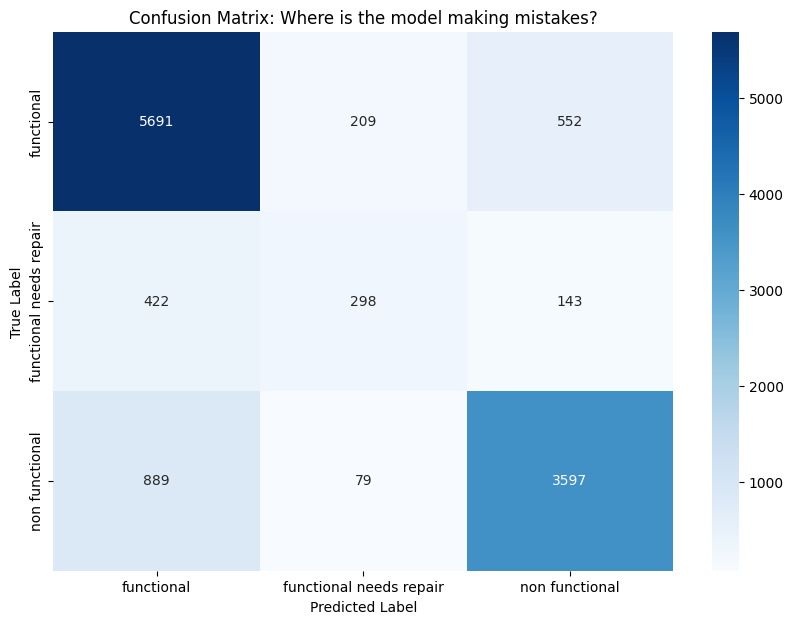

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Where is the model making mistakes?')
plt.show()